# Evaluación en clasificación

A diferencia de la regresión, una predicción en clasificación generalmente se evalúa teniendo en cuenta si se
acierta o no se acierta la clase real, no con un grado de acierto.

Por ejemplo, supongamos un problema de regresión en el que se necesita dar respuesta a la pregunta
“¿Cuántos litros por metro cuadrado lloverá la próxima semana?”. La evaluación de la predicción consistiría
en medir el grado de acierto como la diferencia numérica entre el valor real y el predicho (por ejemplo, 12 l/
m3 de error).

Por el contrario, supongamos un problema de clasificación en el que se necesita responder a la pregunta
“¿Lloverá o no lloverá la próxima semana?”. En este caso, la evaluación de la predicción consistirá en determinar
si el modelo ha acertado o ha fallado, sin tener en cuenta ningún grado numérico del error en una
única predicción.

Para evaluar las predicciones en clasificación, la métrica de evaluación principal es la matriz de confusión.
La matriz de confusión es una métrica que, a diferencia de las métricas estudiadas hasta ahora, es de tipo
matriz y contiene el recuento de predicciones realizadas organizadas por su correspondencia con la clase
real.

La matriz de confusión es una matriz cuadrada cuyo orden es el número de clases del conjunto de datos.

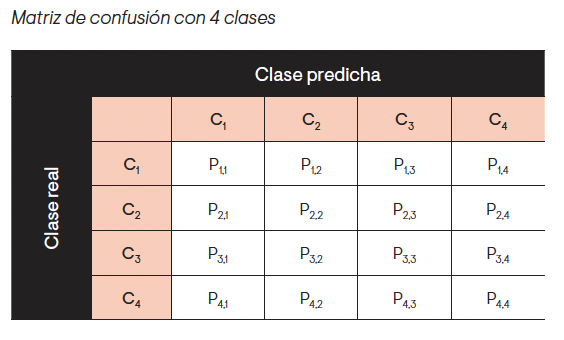


El valor `Pi,j` en los naturales con `i`, `j = 1`, ...,`m` (`m` es el número de clases) de la matriz confusión es el número de predicciones en las que el valor real de la clase es `Ci` y la predicción que arroja el modelo es `Cj`.

Según estas definiciones, la métrica de exactitud que hemos estudiado también puede expresarse del
siguiente modo

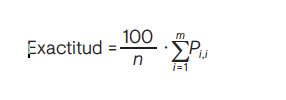


Es especialmente relevante el caso particular binario, es decir, cuando en el conjunto de datos
se tienen 2 clases (m = 2). Por ejemplo, en el problema “¿Lloverá o no lloverá la próxima semana?” o “¿Es un
cliente propenso a irse a la competencia?”, o cualquier otro en el que la respuesta sea “sí” o “no”.

En estos casos, a las clases suelen asociarse los conceptos de positivo y negativo. De esta forma, tenemos
m2 = 4 casos posibles:

- El modelo dice “sí” y la realidad es “sí” (acierto positivo; true positive o `TP` en inglés).
- El modelo dice “no” y la realidad es “no” (acierto negativo; true negative o `TN` en inglés).
- El modelo dice “sí” y la realidad es “no” (falso positivo; false positive o `FP` en inglés).
- El modelo dice “no” y la realidad es “sí” (falso negativo; false negative o `FN` en inglés).

Por consiguiente, en el caso binario la matriz de confusión queda definida tal como se muestra en la Tabla,
y la exactitud según la siguiente ecuación:

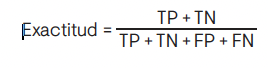

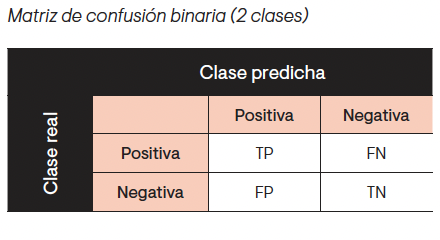


Tanto la matriz de confusión binaria como las métricas de clasificación binaria `TP`, `TN`, `FP` y `FN` no se utilizan
únicamente en problemas de clasificación binaria, sino también en problemas de clasificación multiclase
(m > 2). En concreto, en cualquier problema de clasificación se puede evaluar la bondad de un modelo con
respecto a cada clase.

## Precisión

La `Precisión` se centra en la que definamos como clase positiva y mide la tasa de aciertos positivos con respecto al total de predicciones positivas realizadas. Su fórmula es la siguiente:

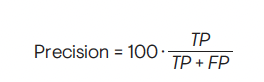

Tal como se desprende de su definición, la precisión mide el grado en el que podemos confiar en las predicciones positivas de un modelo. Un modelo con una precisión del 100 % significa que, siempre que da una predicción positiva, acierta. Por ejemplo, si el modelo resuelve la pregunta “¿Lloverá o no lloverá la próxima semana?” y su predicción es “sí”, entonces acierta seguro. Nótese que esto no implica que cuando dice “no” también acierte siempre: es decir, FN puede ser mayor que cero.

Un modelo con una precisión del 100 % (FP = 0) es muy deseable, pero que pasaría si solo rara vez diese predicciones positivas. Es decir, un modelo, cuando da una predicción positiva, acierta, pero puede apenas dar predicciones positivas (casi siempre da negativas). Un modelo como este puede no ser de utilidad, pues escasas veces se puede contar con él para tomar decisiones. Necesitamos una forma de medir la cantidad de casos positivos que el modelo es capaz de cubrir con sus predicciones positivas acertadas.

## Sensibilidad

La sensibilidad o cobertura (`recall` o `coverage` en inglés) es la métrica que expresa dicha cantidad. En la siguiente
ecuación se muestra su definición:

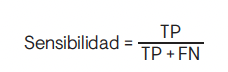

Un modelo con una sensibilidad del 100 % (FN = 0) cubre con predicciones positivas todos los casos reales positivos, es decir, siempre que se ha dado un caso positivo en la realidad, el modelo lo ha predicho correctamente.
Esto parece muy deseable, pero, de forma análoga a como hemos visto con la precisión, no debemos dar por bueno siempre un valor de 100 % de sensibilidad. ¿Qué pasaría si el modelo diera predicciones positivas siempre? Tendría un 100 % de sensibilidad y acertaría en todos los casos que son positivos, pero fallaría en todos los negativos.

>Note: Debemos encontrar modelos con valores altos tanto en sensibilidad como en precisión. De esta forma, tendremos un modelo útil que suele acertar cuando da una predicción positiva, y suele darla siempre que se dan casos positivos reales.

## F-Measure (F1)

Sin embargo, en la práctica, la precisión y la sensibilidad de los modelos suelen estar reñidas: cuando conseguimos
mejorar la precisión de un modelo, su sensibilidad empeora, y viceversa. Necesitamos, por tanto, optimizar ambas métricas (sensibilidad y precisión) en conjunto, no solo una de ellas. Dado que muchos algoritmos admiten una única métrica para optimizar, definimos una nueva métrica, capaz de resumir en un solo número la sensibilidad y la precisión de los modelos. Se trata de la métrica `F-measure` o `F1`

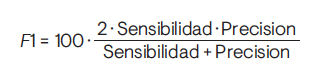



## Ejemplo

En el Programa mostramos un ejemplo en el que se calculan las métricas de evaluación estudiadas tras aplicar el algoritmo de clasificación `SVC`, analizado previamente, sobre el conjunto de datos “iris” empleando una validación cruzada de 5 bolsas.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pprint import pprint
from sklearn.svm import SVC

In [ ]:
# Carga de datos.
datos = datasets.load_iris()
print(np.shape(datos.data))

In [ ]:
# Extraer la matriz de datos "X" y la variable target "y"
X = datos.data
y = datos.target

In [ ]:
# Partición EXTERNA. Test: hold-out split 80-20%.
X_train, X_test, y_train, y_test = train_test_split(datos.data, 
                                                    datos.target, 
                                                    test_size=0.2, 
                                                    random_state=42)
print('Train dimensions: ', np.shape(X_train))
print('Test dimensions:  ', np.shape(X_test))

In [ ]:
# Estandarización de los datos de entrenamiento y test
standardizer = preprocessing.StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

In [ ]:
# Definimos el algoritmo
alg = SVC(C=0.5, gamma='auto', kernel='rbf')

In [ ]:
# Cross-validation interno
# Utilizar comando "cross_val_predict" para extraer directamente las predicciones de las 5 bolsas de validación

"""
Me extrae directamente las predicciones no el modelo entrenado
"""

y_pred = cross_val_predict(alg, 
                           X_train, 
                           y_train, 
                           cv = KFold(n_splits=5, 
                                      shuffle=True, 
                                      random_state=42))
pprint(y_pred)

In [ ]:
# Presentación de los resultados de la evaluación.
print("Exactitud: %.3f" % (metrics.accuracy_score(y_train, y_pred))) # accuracy
print("Precisión: %.3f" % (metrics.precision_score(y_train, y_pred, average="macro"))) # precision
print("Sensibilidad: %.3f" % (metrics.recall_score(y_train, y_pred, average="macro"))) # sensibilidad
print("F1-score: %.3f" % (metrics.f1_score(y_train, y_pred, average="macro"))) # F-score

In [ ]:
# Extraemos la matriz de confusión
print("Matriz de confusión:\n", metrics.confusion_matrix(y_train, y_pred))

In [ ]:
print("Tabla de métricas:\n", metrics.classification_report(y_train, y_pred))

In [ ]:
# Una vez hemos optimizado los hiperparámetros con el conjunto de validación, utilizamos todos los datos de 
# "train" y "validation" para entrenar un modelo definitivo con esos hiperparámetros ajustados
model = SVC(C=0.5, gamma='scale', kernel='rbf') # Definimos el modelo con los hiperparámetros óptimos
model = model.fit(X_train, y_train) # Entrenamos el modelo con todos los datos de "train" + "val"

# y finalmente evaluamos el test con el método "score()"
test_results = model.score(X_test,y_test)
print('Exactitud en test: ', np.round(test_results*100,4), '%')

In [ ]:
# obtenemos las predicciones del test para extraer el resto de métricas de interés
y_pred_test = model.predict(X_test) # Extraer predicciones
print("Tabla de métricas:\n", metrics.classification_report(y_train, y_pred)) # Aplicar el método de classification_report()
print("Matriz de confusión:\n", metrics.confusion_matrix(y_train, y_pred)) # Extraer la matriz de confusión